<a href="https://colab.research.google.com/github/21skar4/GNR-607-Assignment-Guide/blob/main/GNR607_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Guide to run the code**
[Github](https://github.com/21skar4/GNR-607-Assignment-Guide)

**Import libraries**

In [ ]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy 
import numpy as np
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
from math import e

**Loading the image**

In [ ]:
# Load an color image in grayscale
image = cv2.imread('/content/f9166801-64d8-419d-ac5a-ad3ac28dd89a.jpeg',0)
print(image)

[[32 32 32 ... 32 32 32]
 [33 33 33 ... 32 33 33]
 [32 32 32 ... 32 32 32]
 ...
 [33 33 33 ... 32 33 33]
 [33 33 33 ... 32 32 32]
 [33 33 32 ... 32 33 33]]


**Histogram of frequency of grey level**

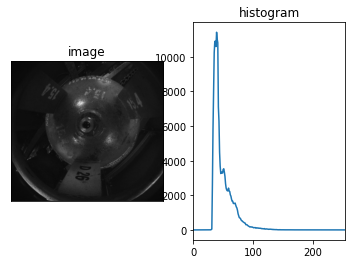

In [ ]:
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('image')
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
hist,bin = np.histogram(image.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram')
plt.show()

**Plotting a histogram**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


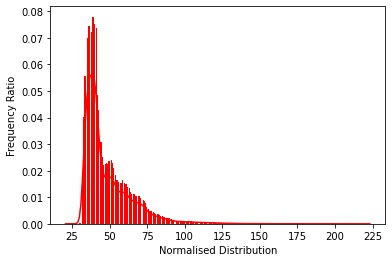

In [ ]:
# plotting a histogram
ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normalised Distribution', ylabel='Frequency Ratio')
 
plt.show()

**Max and min grey level** 

In [ ]:
max_grey_level=numpy.max(image)
min_grey_level=numpy.min(image)
print("Max_grey_level :",max_grey_level,"      Min_grey_level :",min_grey_level)

Max_grey_level : 219       Min_grey_level : 25


In [ ]:
rows,columns=image.shape
print("Rows : ",rows,"Columns : ",columns)



Rows :  422 Columns :  458


**Display the image**

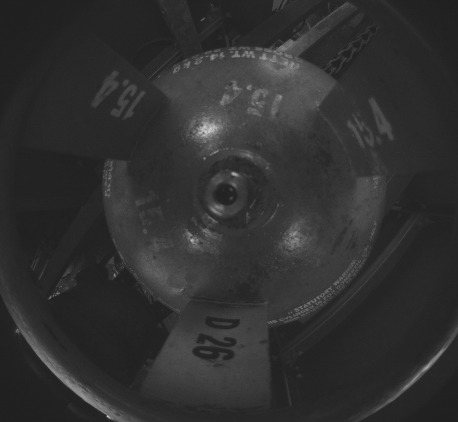

In [ ]:
#Display the image
cv2_imshow(image)



**Linear contrast enhancement**

**Linear Contrast Enchancement with original max and min grey level**


*Not suitable when there is a remote pixel with very less frequency of occurance.*



In [ ]:
def lin_con_enhan1(image,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min gery level
  max_grey_level=numpy.max(image)
  min_grey_level=numpy.min(image)
  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape
  # m is a slope in the linear contrast enchancement,ie, it represents how much the image is stretched
  m=(max_desired-min_desired)/(max_grey_level-min_grey_level)
  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= m*(image[i,j]-min_grey_level) + min_desired
  # plotting normal distribution for newimage 
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  print("m ",m)
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
  return


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


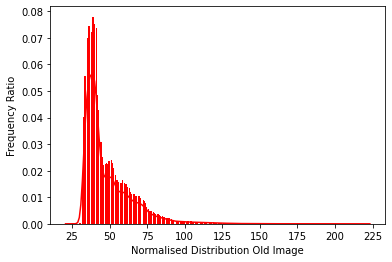

Max_grey_level : 219      Min_grey_level : 25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


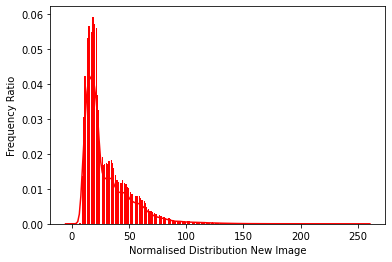

m  1.3144329896907216
New Image data  [[ 9  9  9 ...  9  9  9]
 [10 10 10 ...  9 10 10]
 [ 9  9  9 ...  9  9  9]
 ...
 [10 10 10 ...  9 10 10]
 [10 10 10 ...  9  9  9]
 [10 10  9 ...  9 10 10]]


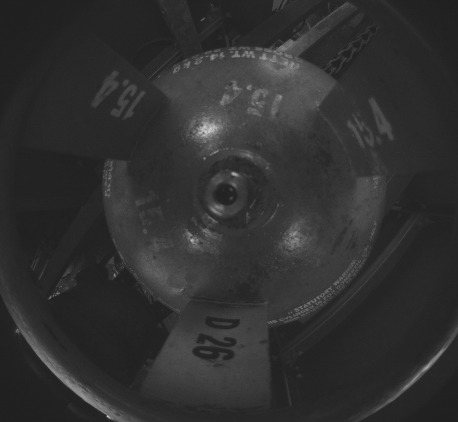

Initial Image


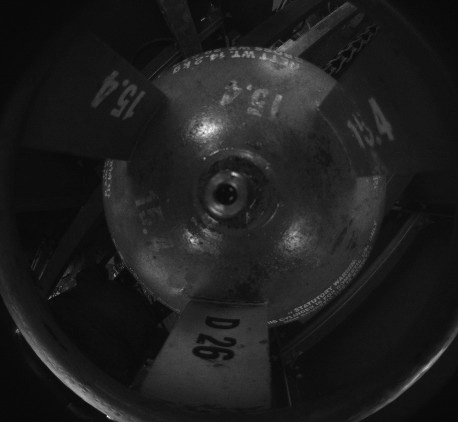

New Image


In [ ]:
lin_con_enhan1(image,255,0)

**Liner Contrast Enhancement2**
**Linear contrast enhancement with maximum and minimum being taken at a distance of K x standard deviation from the mean grey level**

In [ ]:
def lin_con_enhan2(image,k,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min gery level
  mean_grey_level=numpy.mean(image) 
  print("Mean grey Level",mean_grey_level)
  standard_deviation=numpy.std(image)
  print("standard_deviation ",standard_deviation)
  max_grey_level=mean_grey_level + k*standard_deviation
  min_grey_level=mean_grey_level - k*standard_deviation
  if  max_grey_level <= max_desired:
    max_grey_level = max_grey_level
  else:
    max_grey_level = max_desired
  if min_desired <= min_grey_level:
    min_grey_level = min_grey_level
  else:
    min_grey_level = min_desired

  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape
  # m is a slope in the linear contrast enchancement,ie, it represents how much the image is stretched
  m=(max_desired-min_desired)/(max_grey_level-min_grey_level)
  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= m*abs(image[i,j]-min_grey_level) + min_desired
      if newimage[i,j] <= min_desired:
        newimage[i,j] = min_desired
      if max_desired <= newimage[i,j]:
        newimage = max_desired
      else:
        newimage[i,j] = newimage[i,j]
  # plotting normal distribution for newimage 
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  print("m ",m)
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
  return


**We should take k value shuch that most of the pixels are within min and max value**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


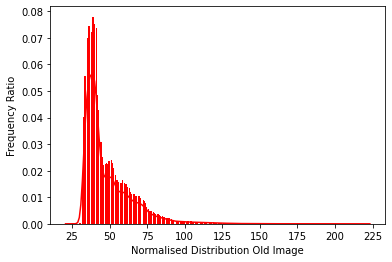

Mean grey Level 48.41751174486227
standard_deviation  16.218161308647336
Max_grey_level : 178.16280221404094      Min_grey_level : 0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


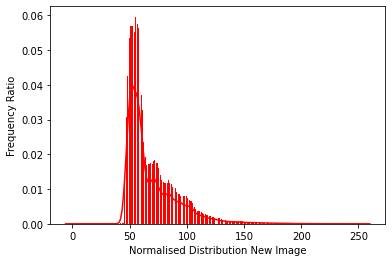

m  1.4312751979150424
New Image data  [[45 45 45 ... 45 45 45]
 [47 47 47 ... 45 47 47]
 [45 45 45 ... 45 45 45]
 ...
 [47 47 47 ... 45 47 47]
 [47 47 47 ... 45 45 45]
 [47 47 45 ... 45 47 47]]


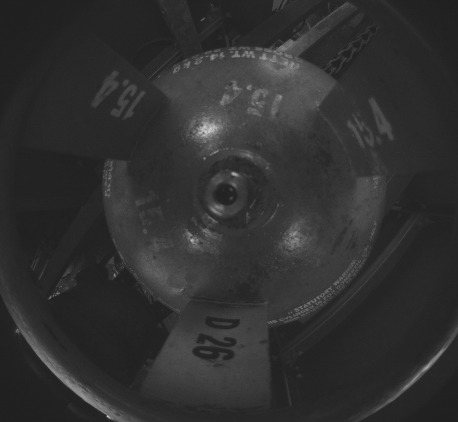

Initial Image


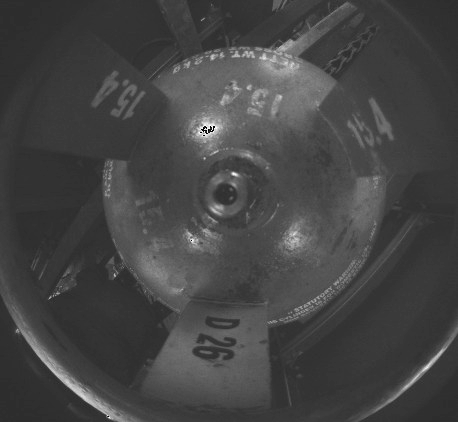

New Image


In [ ]:
lin_con_enhan2(image,8,255,0)

**Log contrast enchancement**

In [ ]:
def log_con_enhan(image,k,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min grey level
  max_grey_level=numpy.max(image)
  min_grey_level=numpy.min(image)
  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape

  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= (max_desired-min_desired)/numpy.log(1+(max_grey_level/k))*numpy.log(1+(image[i,j]/k))+min_desired
  # plotting normal distribution for newimage 
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
  return

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


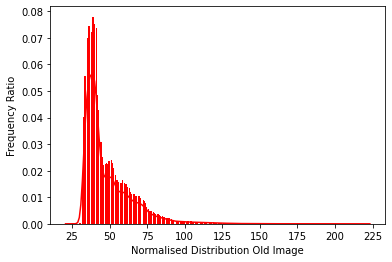

Max_grey_level : 219      Min_grey_level : 25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


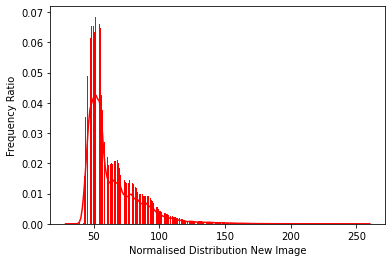

New Image data  [[43 43 43 ... 43 43 43]
 [44 44 44 ... 43 44 44]
 [43 43 43 ... 43 43 43]
 ...
 [44 44 44 ... 43 44 44]
 [44 44 44 ... 43 43 43]
 [44 44 43 ... 43 44 44]]


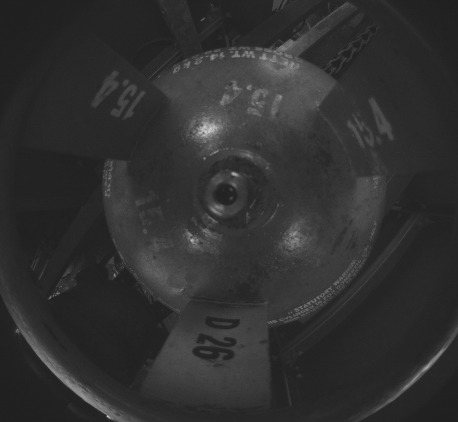

Initial Image


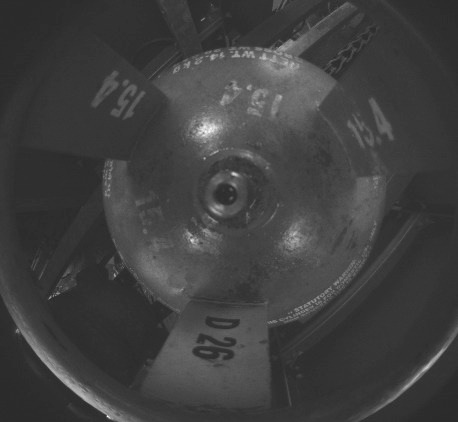

New Image


In [ ]:
log_con_enhan(image,500,255,0)

**Exponential contrast enhancement**

In [ ]:
def exp_con_enhan(image,k,max_desired,min_desired):
  # plotting normal distribution for image
  ax = sns.distplot(image.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution Old Image', ylabel='Frequency Ratio')
  plt.show()
  # max and min gery level
  max_grey_level=numpy.max(image)
  min_grey_level=numpy.min(image)
  print("Max_grey_level :",max_grey_level,"     Min_grey_level :",min_grey_level)
  #rows and columns of the pixels in the image
  rows,columns=image.shape

  # newimage is an empty list to store the contrast enchnaced image
  newimage=np.zeros((rows,columns),dtype = 'uint8')
  
  #the enchancement
  for i in range(0,rows):
    for j in range(0,columns):
      newimage[i,j]= ((max_desired-min_desired)/((np.power(e,(max_grey_level/k)))-1))*((np.power(e,(image[i,j]/k)))-1)+min_desired
  # plotting normal distribution for newimage 
  ax = sns.distplot(newimage.ravel(),256,[0,255],
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normalised Distribution New Image', ylabel='Frequency Ratio')
  plt.show()
  #printing newimage data
  print("New Image data ",newimage)
  #displaying the initial image
  cv2_imshow(image)
  print("Initial Image")
  #displaying the new image
  cv2_imshow(newimage)
  print("New Image")
  return

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


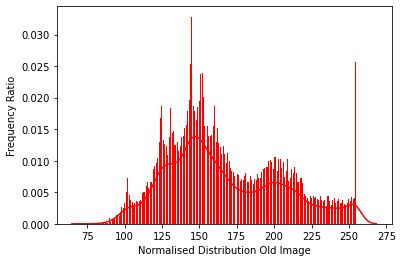

Max_grey_level : 255      Min_grey_level : 78


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


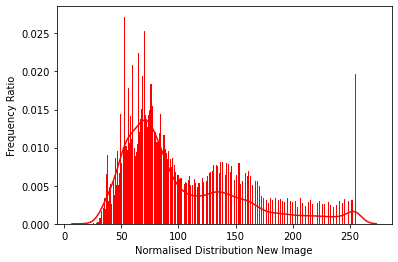

New Image data  [[ 97  97  97 ...  50  66  72]
 [ 97  97  97 ...  39  55  61]
 [ 99  99  99 ...  32  47  56]
 ...
 [ 61  51  45 ...  52  65  74]
 [ 67  56  50 ...  50  66  81]
 [ 81  68  60 ...  61  85 111]]


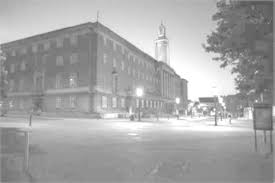

Initial Image


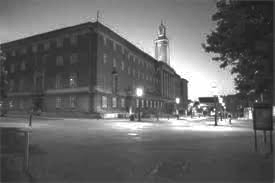

New Image


In [ ]:
exp_con_enhan(image,100,255,0)